In [ ]:
!pip install torch

# PyTorch Lesson -1


 This is pyTorch for beginner Open Cv bootcamp 's Lecture- 1

# Importing Dependencies

## start with `!pip install torch`
and
## `pip install torchviz`
to visualize the computation graph

In [ ]:
!pip install torchviz

In [ ]:
# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [ ]:
# importing
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
# check torch version
print("Torch version: ",torch.__version__)

Torch version:  2.8.0+cu126


## Converting the images into batched tensors

An image is made up of pixel arrays that represent the intensity of pixels in grayscale or the color values in RGB format. When working with deep learning models, it's often necessary to convert these images into tensors, which are the primary data structures used in PyTorch for handling and processing data.

- **Tensors** are boxes that contain numbers in an organized way.
- **0-D Tensors** : scalar number (one number)
- **1-D Tensors** : list of number ( [2,3,4])
- **2-D Tensors** : Matrix
- **3-D and more** : **Higher Tensors** -eg cube or others with >3 dimensions


#### In PyTorch, tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the fundamental building blocks for representing data and parameters in neural networks.

**Batches**: Batching is a technique where multiple data samples (images, in this case) are grouped together into a single tensor. This allows efficient processing of multiple samples simultaneously, to take advantage of the parallel processing capabilities of modern hardware.

In [ ]:
# Converting two MNist images into a single batched of tensors - shape (2,3,28,28)

# Load the mnist_0 picture and store this as numeric array using cv2
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")
print(digit_1_array_og)

[[[0 0 0]
  [5 5 5]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [9 9 9]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[7 7 7]
  [9 9 9]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
# do the same load the image and store as numberic array but not in color only black and white
digit_0_array_gray = cv2.imread("mnist_0.jpg", cv2.IMREAD_GRAYSCALE)
digit_1_array_gray = cv2.imread("mnist_1.jpg", cv2.IMREAD_GRAYSCALE)

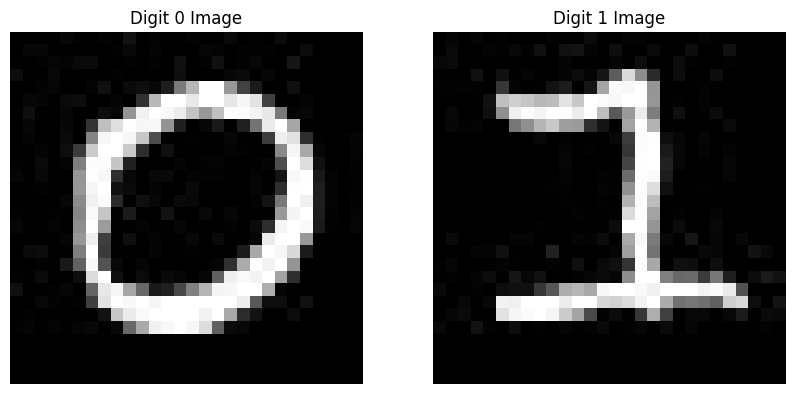

In [ ]:
# visualize the image
# 1 row 2 col sub plotting
fig, axs = plt.subplots(1,2, figsize = (10,5))

# 1st col to show 0 image with color mapping gray without smoothing the pixels
axs[0].imshow(digit_0_array_og,cmap="gray", interpolation="none")
axs[0].set_title("Digit 0 Image")
axs[0].axis("off")

# 2nd col to show 2 image with color mapping gray without smoothing the pixels
axs[1].imshow(digit_1_array_og, cmap="gray", interpolation="none")
axs[1].set_title("Digit 1 Image")
axs[1].axis("off")

plt.show()

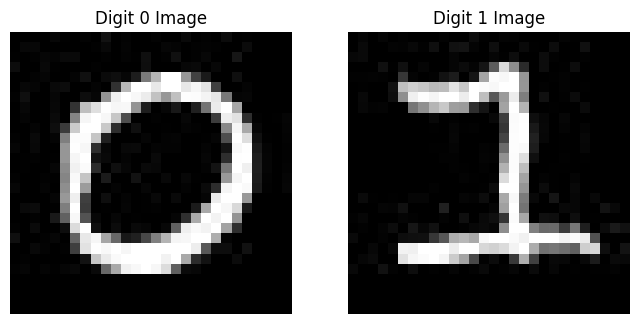

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].imshow(digit_0_array_og,cmap= "gray",interpolation="none")
axes[0].set_title("Digit 0 Image")
axes[0].axis("off")

axes[1].imshow(digit_1_array_og,cmap="gray", interpolation="none")
axes[1].set_title("Digit 1 Image")
axes[1].axis("off")

plt.show()

In [ ]:
# Numpy array with three channels
print("Image array shape:", digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)}; Max pixel value: {np.max(digit_0_array_og)}")

Image array shape: (28, 28, 3)
Min pixel value:0; Max pixel value: 255


In [ ]:
print("Image array shape: ",digit_1_array_og.shape)
print(f"Min pixel value : {np.min(digit_1_array_og)}, Max pixel value: {np.max(digit_1_array_og)}")

Image array shape:  (28, 28, 3)
Min pixel value : 0, Max pixel value: 255


- The image is 28 pixels high and 28 pixels wide with three channels (R,G,B)
- Pixel value range 0–255

Each channel value is an 8-bit integer, where:

0 = black

255 = full intensity of that color


8-bit integers are numbers that can be represented using 8 bits (1 byte) in binary.

Key points:

Range of values:

An unsigned 8-bit integer can hold values from 0 to 255. ( 2 power 8). A signed 8-bit integer can hold values from -128 to 127. Each color channel (Red, Green, Blue) in an image uses 8 bits. This allows 256 levels of intensity per channel.

0 → no color (dark)

255 → full color (bright)

Example:

A pixel with [R, G, B] = [0, 128, 255]

Red = 0 (off)

Green = 128 (medium)

Blue = 255 (full)

In [ ]:
#  a look at 28x28 single channel image's pixel values
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  2,  15,   0,   0,   6,   0,   0,  13,   6, 148, 241, 255, 248,
        236, 194, 151, 192, 253, 252, 244, 231, 121,   5,   6,   0,   0,
          0,   0],
       [  0,   7,   0,   0,   7,   0,  51, 191, 223, 254, 247, 248, 148,
         30,   0,   6,  24,   0,  32, 116, 235, 255, 166,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   0,  10,   0, 132, 246, 255, 247, 199,  77,   0,
          0,   2,   0,   0,   7,   0,   0,  60, 238, 226,  46,   2,   0,
          1,   5],
       [  0,   0,   4,   0,  14,  59, 203, 255, 255, 201,  45,   1,  15,
          0,   0,   1,   0,   4,   2,   0,   0, 137, 246, 169,   7,   0,
          0,   4],
       [  2,   0,   9,   0,   4, 127, 252, 252, 198,  32,   0,   0,   0,
          5,   0,   3,   4,   0,   0,   1,   5,  78, 255, 222,  16,   1,
          0,   3],
       [  5,   0,   8,   0,   0, 150, 254, 247,  46,   7,   0,   8,   9,
          0,   4,   3,   3,   0,   0,   4,   0,  19, 248, 254,  25,   4,
          0,   2],
       [  0,   1,   2,   0,   1, 150, 246, 255,  17,   9,   0,   4,   0,
          0,   9,   0,   0,   0,   0,   6,   0,  46, 254, 255,  30,   5,
          0,   2],
       [  0,   1,   0,   0,   6, 139, 241, 251,  43,   0,  15,   6,   0,
          9,   7,   0,   0,   0,   0,   3,  19, 120, 255, 240,  31,   5,
          0,   3],
       [  2,   0,   0,   2,   1, 133, 249, 197,   0,  27,   0,   0,  18,
          0,   0,   8,   0,   7,   1,   0,   0, 153, 245, 255,  29,   3,
          0,   5],
       [  6,   0,   0,   4,   0, 142, 255, 156,   1,   0,   4,   0,   0,
          6,   0,   0,   0,   3,   0,  10,  45, 245, 255, 250,  26,   2,
          0,   6],
       [  0,   0,   0,   0,   5, 152, 239,  63,   0,  14,   0,   4,   0,
          1,   8,   0,   9,   0,   0,   5, 236, 255, 255, 152,   0,   0,
          0,   0],
       [  0,   9,  11,   0,   1, 126, 255,  59,   0,   1,   0,   5,   0,
          1,   2,   0,   0,   0,  27, 169, 255, 247, 217,  26,   0,   0,
          0,   0],
       [  0,   0,   2,   0,  25,  97, 248,  83,   7,   0,   6,   0,   1,
          0,   0,   0,   5,  47, 171, 255, 243, 255, 148,   0,   0,   0,
          0,   0],
       [  2,   0,  10,   0,   0,  13, 219, 255,  15,   0,  11,   0,   9,
          6,   0,   7,  97, 239, 249, 243, 255, 163,  46,   0,   0,   0,
          0,   0],
       [ 15,   0,   0,   2,   6,   0, 100, 232, 246, 166, 104,  24,  32,
         72, 128, 180, 245, 247, 255, 255, 174,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   8,   3,   0,   2,  63, 226, 254, 248, 255, 246, 255,
        255, 255, 255, 255, 255, 237,  88,  13,  13,   0,  17,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,  18, 199, 235, 250, 255, 255,
        255, 255, 242, 255, 169,  43,  18,   0,   0,  11,   0,   0,   0,
          0,   0],
       [  2,   5,   0,   4,   1,   5,   8,   0,   9, 104, 169, 241, 248,
        255, 247, 220,  95,  10,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

## Convert Numpy Array to Torch Tensors

In [ ]:
# convert the images to PyTorch tensors and normalize
# normalize so the the channels 8 bit(1 bytes) 0 to 255 will be 0 to 1 if divide by 255
# nn learn faster when inputs are small numbers (like 0–1 instead of 0–255).
# Prevent numerical instability during training.

# convert and normalize image - 0 to 1
img_tensor_0 = torch.tensor(digit_0_array_og,dtype= torch.float32) / 255
img_tensor_1 = torch.tensor(digit_1_array_og, dtype = torch.float32) /255

In [ ]:
print("Shape of Normalized image tenor 0: ", img_tensor_0.shape)
print(f"Normalized Min pixel value: {torch.min(img_tensor_0)}, Normalized Max pixel value: {torch.max(img_tensor_0)} ")

Shape of Normalized image tenor 0:  torch.Size([28, 28, 3])
Normalized Min pixel value: 0.0, Normalized Max pixel value: 1.0 


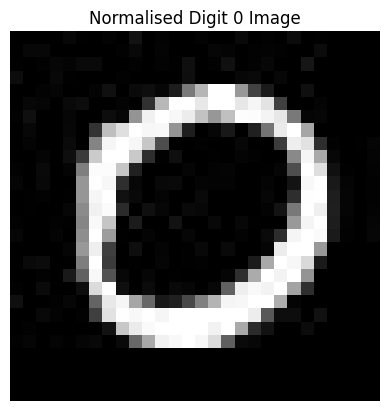

In [ ]:
plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis("off")
plt.show()

## 1.2 Creating Input Batch
In PyTorch the forward pass of input images to the model is expected to have batch_size > 1
- We convert to batch, so that to process multiple images simultaneously

In [ ]:
# using stack
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

print("Batch Tensor Shape: ", batch_tensor.shape) # in -> N H W C format

Batch Tensor Shape:  torch.Size([2, 28, 28, 3])


### In PyTorch, the image tensors typically follow the shape convention N, C, H, W unlike Tensorflow which follows N, H, W, C

- so we need to bring the color channel to the second dimension to fix the form

In [ ]:
# bring the color channel to front (second dimension) with permute or view (torch.permute()/torch.view())
batch_input = batch_tensor.permute(0,3,1,2)
print("New Batch Tensor Shape: ",batch_input.shape)


New Batch Tensor Shape:  torch.Size([2, 3, 28, 28])


## Introduction to Tensors and its Operatioins
We have seen the importance of tensors, now will understand it from ground up. Tensor is simply a fancy name given to matrices. If you are familiar with NumPy arrays, understanding and using PyTorch Tensors will be very easy. A scalar value is represented by a 0-dimensional Tensor. Similarly, a column/row matrix is represented using a 1-D Tensor and so on. Some examples of Tensors with different dimensions are follow.

## Construct First Tensor

In [ ]:
# create a tensor with just ones in a column
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [ ]:
b = torch.zeros(5)
print(b)

tensor([0., 0., 0., 0., 0.])


In [ ]:
# can also create tensor with custom values
c = torch.tensor([1.,2.,3.,4.,5.])
c

tensor([1., 2., 3., 4., 5.])

In [ ]:
# in all the aboves, created vectors(list) or Tensor of dimension
# creating higher tensor

d = torch.zeros(2,4)

In [ ]:
d

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
e = torch.ones(3,3)
print(e)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
f = torch.tensor([[1,2],[4,5]])
f

tensor([[1, 2],
        [4, 5]])

In [ ]:
# customize 2 d
f = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
print(f)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
f.shape

torch.Size([2, 3])

In [ ]:
# 3 D tensor (stack of 2 x 2 matrix)
# 2 blocks, 2 rows, 2 columns
g = torch.tensor([[[1.,2.],[3.,4.]], [[5.,6.],[7.,8.]]])
print(g)
print(g.shape)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


In [ ]:
i = torch.tensor([[[1.,2.],[3.,4.],[5.,6.],[7.,8.]],[[9.,10.],[11.,12.],[13.,14.],[15.,16.]]])
print(i)

tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.],
         [13., 14.],
         [15., 16.]]])


In [ ]:
print(i.shape)

torch.Size([2, 4, 2])


In [1]:
# 4- D
y = torch.tensor([
    [
        [[1.,2.,4.],[3.,4.,6.]],
        [[5.,6.,7.],[7.,8.,8.]]
    ],
    [
        [[1.,3.,3.4],[3.5,5.,6.]],
        [[1.2,2.,3.],[3.4,5.,7.]]
    ]
])
y.shape
y[0,0,1,2]

NameError: name 'torch' is not defined

### Access *an* Element in Tensor

In [ ]:
# access a element in tensor
# for 1 - D vector(list)
# a = torch.zeros(5)
# c = torch.tensors([1.,2.,3.,4.,5.])

print(c)

tensor([1., 2., 3., 4., 5.])


In [ ]:
# Get element at index 2
print(c[2])
print(c[0])

tensor(3.)
tensor(1.)


- For 2D, 3D tensors, to access one particular element in a tensor, we need to specify indices equal to the diemension of tensor

In [ ]:
# for 2D and 3D tensor

# x [0] first matrix
# x [0][0] first matrix's 1st row
# x [0][0][1] first matrix's first row's 2nd element



In [ ]:
print(f.shape)

torch.Size([2, 3])


In [ ]:
f

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# f = torch.tensors([[1.,2.,3.],[4.,5.,6.]]) => 2 D
# All Indies starts from 0

# element at row 1 , column 0
print(f[1,1])

# can also use
print(f[1][2])

print(f[0])

tensor(5.)
tensor(6.)
tensor([1., 2., 3.])


In [ ]:
f[0,1]

tensor(2.)

In [ ]:
# 3D Tensor
j = torch.tensor([[[1.,2.],[3.,4.]],[[5.,6.],[7.,8.]],[[9.,10.],[11.,12.]]])
print(j.shape)

torch.Size([3, 2, 2])


In [ ]:
print(j[0,1,0])

tensor(3.)


In [ ]:
k = torch.tensor([
    [ # block 0
        [
            [1.,2.],
            [3.,4.]
        ],
        [
            [5.,6.],
            [7.,8.]
        ]
    ]
    ,
    [ # block 1
        [
            [9.,10.],
            [11.,12.]
        ],
      [
          [13.,14.],
          [15.,16.]
      ]

    ]
])
print(k)

tensor([[[[ 1.,  2.],
          [ 3.,  4.]],

         [[ 5.,  6.],
          [ 7.,  8.]]],


        [[[ 9., 10.],
          [11., 12.]],

         [[13., 14.],
          [15., 16.]]]])


In [ ]:
print(k.shape)

torch.Size([2, 2, 2, 2])


In [ ]:
m = torch.randn(4)
print(m)
print(m.shape)

tensor([-1.1087, -0.4111, -0.7564, -1.7540])
torch.Size([4])


In [ ]:
print(m[0])

tensor(-1.1087)


In [ ]:
print(m[3])

tensor(-1.7540)


In [ ]:
n = torch.randn(3,4)
print(n)
print(n.shape)
print(n[0])
print(n[2][1])

tensor([[ 0.8049,  0.7878,  0.7556,  0.1236],
        [ 0.5319,  0.3124,  1.9498,  0.3281],
        [-0.6359, -0.3804,  0.9207,  1.1681]])
torch.Size([3, 4])
tensor([0.8049, 0.7878, 0.7556, 0.1236])
tensor(-0.3804)


In [ ]:
o = torch.randn(3,2,4)
print(o)
print(o.shape)
print(o[0]) # first block
print(o[1][1])
print(o[1][1][3])


tensor([[[-0.0824, -0.7698, -0.1878,  1.0162],
         [ 0.5657, -0.9356, -0.6088,  0.2940]],

        [[ 0.5738,  1.5485, -1.7155, -0.6574],
         [ 0.8075, -0.2732,  0.7864, -0.9984]],

        [[-0.2436, -0.2588, -1.0741, -2.0306],
         [ 0.3958, -0.5051,  0.2106,  0.0557]]])
torch.Size([3, 2, 4])
tensor([[-0.0824, -0.7698, -0.1878,  1.0162],
        [ 0.5657, -0.9356, -0.6088,  0.2940]])
tensor([ 0.8075, -0.2732,  0.7864, -0.9984])
tensor(-0.9984)


In [ ]:
print(o[1,:,2])

tensor([-1.7155,  0.7864])


In [ ]:
p = torch.randn(2,3,2,4)
p.shape

torch.Size([2, 3, 2, 4])

In [ ]:
p

tensor([[[[ 1.7630,  1.9969, -0.9772,  1.4814],
          [-0.1228,  1.5901, -0.0716,  0.6585]],

         [[-0.1082,  0.1953, -1.8963,  0.6750],
          [ 1.1447, -0.0661,  2.0756, -0.0366]],

         [[ 0.9837,  0.0385, -1.3632, -1.4340],
          [-0.4682,  1.0766, -0.3325,  0.2221]]],


        [[[ 0.9697,  0.1458, -0.4636, -0.0564],
          [-1.4309, -0.8842, -2.0096, -0.3663]],

         [[-0.9519,  0.6932,  1.7420, -0.6220],
          [-0.2152,  0.4855,  1.0882,  0.6479]],

         [[ 0.6192,  0.4967,  0.2766,  0.5454],
          [-1.1367, -1.5727, -0.5806, -0.0383]]]])

In [ ]:
p[1,2,0,0]

tensor(0.6192)

In [ ]:
p = torch.zeros(2,2,3)
print(p)
print(p.shape)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])


In [ ]:
p = torch.tensor(
    [
        [ # block 0
            [1,2],
          [3,4]
        ],
        [ # block 1
            [4,5],
          [6,7]
        ],
        [ # block 2
            [9,10],
            [11,12]
        ]
    ]
)
# so 3 block, 2 , 2
print(p.shape)

torch.Size([3, 2, 2])


In [ ]:
# 4 D
q = torch.randn(3,3,2,4 )  #3 batch, 3 block, 2 row, 4 cols
print(q.shape)
print(q)
print(q[1]) # 2nd batch
print(q[1][0]) # 2nd batch 1st block
print(q[0][1][0]) # 1st batch 2nd block's 1st row
print(q[0][1][0][1]) # 1st batch 2nd block's 1st row 's 2nd element

torch.Size([3, 3, 2, 4])
tensor([[[[ 0.3041, -0.5715, -0.4380, -0.4275],
          [-0.2864, -0.2677, -0.0809, -0.8507]],

         [[ 0.1645,  2.0424,  0.4838,  2.0126],
          [ 0.8625, -1.2912,  0.8560,  0.8503]],

         [[-0.5546,  0.1931,  1.9637, -0.0702],
          [-0.9161, -0.7232, -0.0703, -0.5734]]],


        [[[-0.5894, -0.7174, -0.3829,  0.5609],
          [ 1.8406,  1.2167,  0.9939,  0.6495]],

         [[-0.6288,  0.0921,  0.4499, -0.2327],
          [ 0.0284, -0.8729,  0.6076,  0.5663]],

         [[ 0.0038,  1.3751, -0.4178,  0.4556],
          [ 1.8141,  0.5346, -1.3022,  1.2257]]],


        [[[ 0.9901,  0.5870,  0.8649,  0.3974],
          [ 2.8776,  0.0864,  0.5856,  1.1964]],

         [[-0.1143,  1.6875,  0.2240, -0.1620],
          [ 1.5617, -0.0899,  0.3256, -1.0178]],

         [[ 1.4799, -0.4273, -0.4398,  1.6698],
          [ 2.5616, -0.0894,  1.2277,  1.7336]]]])
tensor([[[-0.5894, -0.7174, -0.3829,  0.5609],
         [ 1.8406,  1.2167,  0.9939,  0.6

In [ ]:
r = torch.tensor([
    [
        [
            [1,2,3],
            [4,5,6]
        ],
        [
            [1,3,4],
            [6,7,8]
        ]
    ],
    [
        [
            [4,5,6],
            [8,9,10]
        ],
        [
            [11,12,13],
            [44,33,56]
        ]
    ]
]
)
print(r.shape) # 2,2,2,3

torch.Size([2, 2, 2, 3])


In [ ]:
r[0,1,:,0]

tensor([1, 6])

In [ ]:
print(q[1,0,1,0])

tensor(1.8406)


In [ ]:
n[:,1]

tensor([ 0.7878,  0.3124, -0.3804])

In [ ]:
q.shape

torch.Size([3, 3, 2, 4])

In [ ]:
q[0,0,:,2]

tensor([-0.4380, -0.0809])

In [ ]:
n[:,2]

tensor([0.7556, 1.9498, 0.9207])

In [ ]:
r.shape

torch.Size([2, 2, 2, 3])

## Specify Data Type of Elements

Whenever create a tensor, PyTorch decides the data type of the elements of the tensor such that the data type can cover all the elements of the tensor. Can override this by specifying the data type while creating the tensor.

In [ ]:
int_tensor = torch.tensor([1,2,4]) # 1D vector
int_tensor.dtype

torch.int64

In [ ]:
float_tensor = torch.tensor([1,2.1,3])
float_tensor.dtype

torch.float32

In [ ]:
# converting the float to int tensor
int_converted_tensor = float_tensor.type(torch.int64)
print(int_converted_tensor.dtype)

torch.int64


In [ ]:
int_converted_tensor

tensor([1, 2, 3])

In [ ]:
float_t = torch.tensor([[1,2,4.5],[6,7,8.3]])
float_t.dtype

torch.float32

In [ ]:
int_t = float_t.type(torch.int64)
int_t

tensor([[1, 2, 4],
        [6, 7, 8]])

In [ ]:
float_again= int_t.type(torch.float32)
float_again.dtype

torch.float32

In [ ]:
float_again

tensor([[1., 2., 4.],
        [6., 7., 8.]])

## Tensor From/To Numpy Array

In [ ]:
# Tensor to numpy array
print(f)
print(f.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


In [ ]:
f_numpy = f.numpy()
print(f_numpy.shape)

(2, 3)


In [ ]:
print(f_numpy)

[[1. 2. 3.]
 [4. 5. 6.]]


In [ ]:
f_numpy

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
# Numpy Array to Tensor
h = np.array([[6,8,9],[9,21,33]])
h_tensor = torch.from_numpy(h)
print(h)

[[ 6  8  9]
 [ 9 21 33]]


In [ ]:
h_tensor

tensor([[ 6,  8,  9],
        [ 9, 21, 33]])

## Arithematic Operations on Tensor
- Add
- Sub
- Mult
- Div
- Matrix Mult (`1stRx1stCol, 1stRx2ndCol`)

In [ ]:
tensor_1 = torch.tensor([[1,2,4],[5,6,8]])
tensor_2 = torch.tensor([[-1,2,2],[5,-3,6]])

# Addition
print(tensor_1+tensor_2)
print(torch.add(tensor_1,tensor_2))

tensor([[ 0,  4,  6],
        [10,  3, 14]])
tensor([[ 0,  4,  6],
        [10,  3, 14]])


In [ ]:
# Subtraction
print(tensor_1-tensor_2)
print(torch.sub(tensor_1, tensor_2))

tensor([[ 2,  0,  1],
        [ 1, 11,  2]])
tensor([[ 2,  0,  1],
        [ 1, 11,  2]])


In [ ]:
# Division
# Division by Scalar number
print(tensor_1/2)

# Division by other tensor - Elementwise division
print(tensor_1/tensor_2)

tensor([[0.5000, 1.0000, 2.0000],
        [2.5000, 3.0000, 4.0000]])
tensor([[-1.0000,  1.0000,  2.0000],
        [ 1.0000, -2.0000,  1.3333]])


In [ ]:
# Multiplication
# With Scalar Number
print(tensor_1*2)

# With another tensor(elementwise multi)
print(tensor_1*tensor_2)

# With another tensor but matrix multiplication
# 1st row x 1st col , 1st row x 2nd col
tensor_3 = torch.tensor([[1,2],[3,4],[5,7]])
print(tensor_3.shape)

tensor([[ 2,  4,  8],
        [10, 12, 16]])
tensor([[ -1,   4,   8],
        [ 25, -18,  48]])
torch.Size([3, 2])


In [ ]:
print(tensor_1.shape)
result = torch.mm(tensor_1,tensor_3)
print(result)
print(result.shape)

torch.Size([2, 3])
tensor([[27, 38],
        [63, 90]])
torch.Size([2, 2])


## Broadcasting
 - `a` is a 1-dimensional tensor with shape \([ 3 ]\).
 - `b` is a scalar tensor with shape \([ 1 ]\).
 - When adding `a` and `b`, PyTorch broadcasts `b` to match the shape of `a`, resulting in \([ 1 + 4, 2 + 4, 3 + 4 ]\).


In [ ]:
a = torch.tensor([1,2,4])
b = torch.tensor([4])

# adding a scalar to a vector
result = a+b
print(result)

tensor([5, 6, 8])


[Broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics) allows PyTorch to perform element-wise operations on tensors of
   - `a` is a 2-dimensional tensor with shape \([1, 3]\).
   - `b` is a 2-dimensional tensor with shape \([3, 1]\).
   - When adding `a` and `b`, PyTorch broadcasts both tensors to the common shape \([3, 3]\), resulting in:
   
     \
     \begin{bmatrix}
     1+4 & 2+4 & 3+4 \\
     1+5 & 2+5 & 3+5 \\
     1+6 & 2+6 & 3+6 \\
     \end{bmatrix}
     \.




In [ ]:
a = torch.tensor([[1,2,3]])
b = torch.tensor([[4],[5],[6]])
result= a+b
print(result)

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


## CPU/GPU Tensor

In [ ]:
# Create a tensor for CPU
tensor_cpu = torch.tensor([[1,2,3],[4,5,6]],device='cpu')

In [ ]:
tensor_gpu = torch.tensor([[1,4,5],[3,4,6]], device="cuda")

In [ ]:
tensor_cpu*5

tensor([[ 5, 10, 15],
        [20, 25, 30]])

In [ ]:
tensor_gpu*5

tensor([[ 5, 20, 25],
        [15, 20, 30]], device='cuda:0')

In [ ]:
# Moving CPU and GPU vice versa
tensor_cpu_gpu = tensor_cpu.to(device="cuda")

tensor_gpu_cpu = tensor_gpu.to(device="cpu")